In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import statsmodels.api as sm
%matplotlib inline

In [2]:
boston_data=load_boston()

In [3]:
dir(boston_data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
features=boston_data['data']

In [5]:
features

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
cols=boston_data['feature_names']

In [7]:
cols

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
data=pd.DataFrame(data=features,columns=cols)

In [9]:
data['PRICE']=boston_data['target']

In [10]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [11]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

C:\Users\julia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'No. houses')

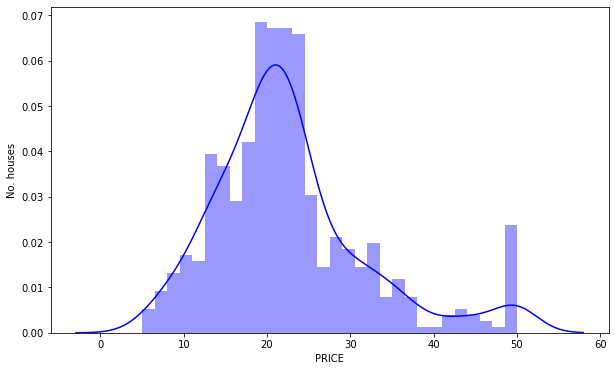

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(data['PRICE'],bins=30,color='blue')
plt.ylabel('No. houses')


Text(0, 0.5, 'No. houses')

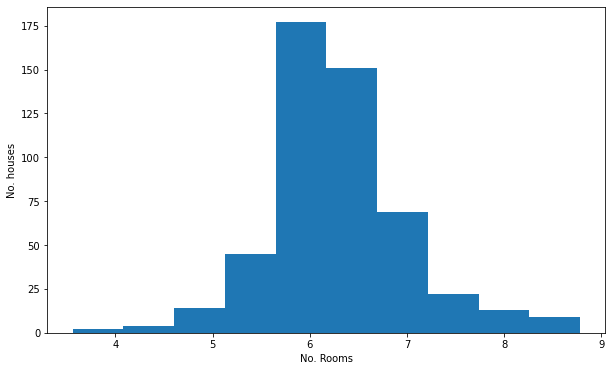

In [13]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'], bins=10)
plt.xlabel('No. Rooms')
plt.ylabel('No. houses')

Text(0, 0.5, 'No. houses')

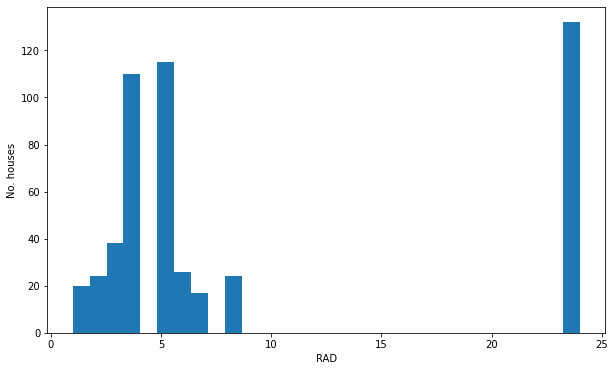

In [14]:
plt.figure(figsize=(10,6))
freq=data['RAD'].value_counts()
plt.hist(data['RAD'], bins=30)
plt.xlabel('RAD')
plt.ylabel('No. houses')
#plt.bar(data['RAD'].value_counts().index,height=freq,bins=10)

<BarContainer object of 9 artists>

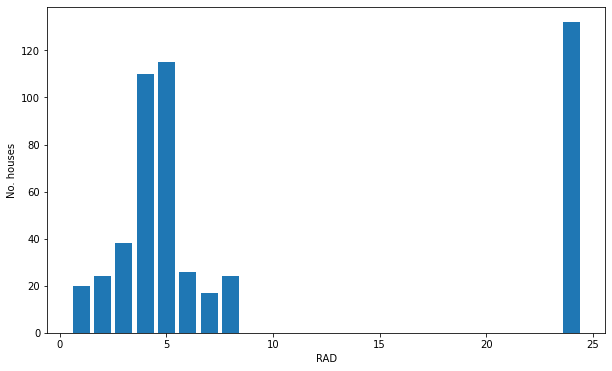

In [15]:
freq=data['RAD'].value_counts()
plt.figure(figsize=(10,6))
plt.xlabel('RAD')
plt.ylabel('No. houses')
plt.bar(x=freq.index,height=freq)

In [16]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [17]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

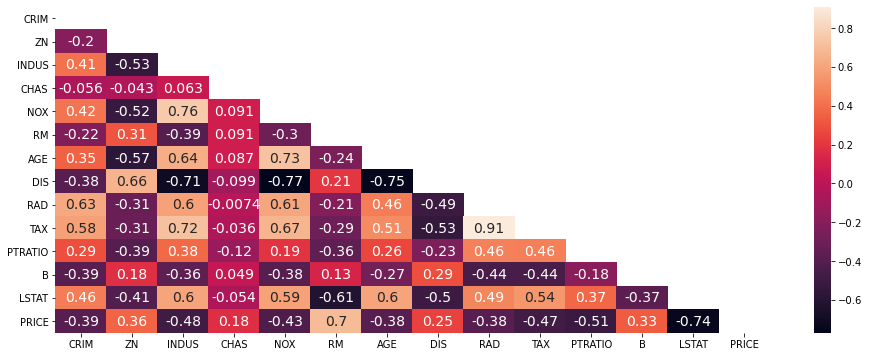

In [18]:
plt.figure(figsize=(16,6))
mask=np.zeros_like(data.corr())
trian=np.triu_indices_from(mask)
mask[trian]=True

sns.heatmap(data.corr(),annot=True,mask=mask,annot_kws={'size':14})

In [19]:
data['DIS'].corr(data['NOX'])

-0.7692301132258278

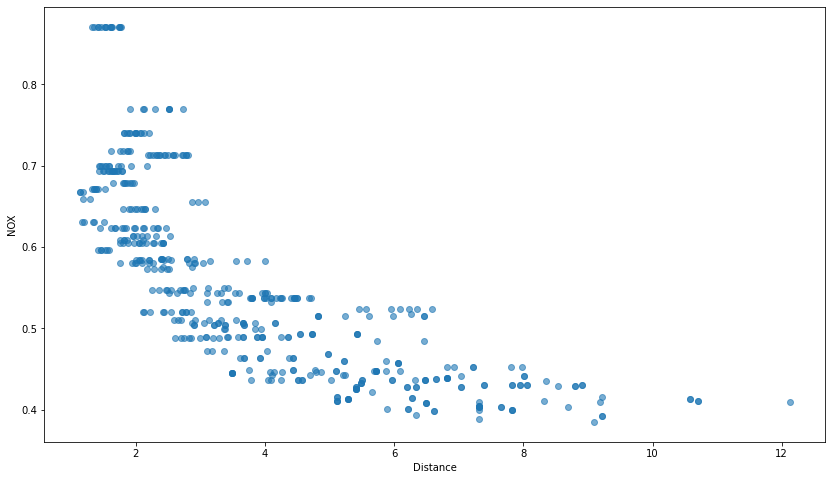

In [20]:
plt.figure(figsize=(14,8))
plt.scatter(x=data['DIS'],y=data['NOX'],alpha=0.6)
plt.title='Distance vs Pollution'
plt.xlabel('Distance')
plt.ylabel('NOX')
plt.show()

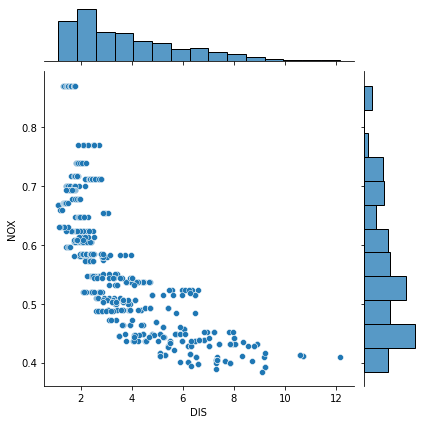

In [21]:
sns.jointplot(x=data['DIS'],y=data['NOX'])


C:\Users\julia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


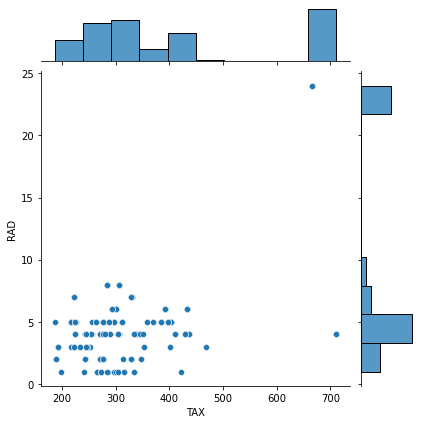

In [22]:
sns.jointplot(data['TAX'],data['RAD'])


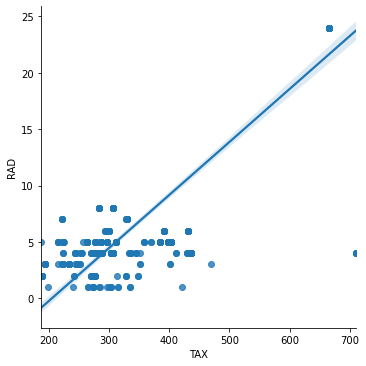

In [23]:
sns.lmplot(x='TAX',y='RAD',data=data)

Text(0, 0.5, 'Price')

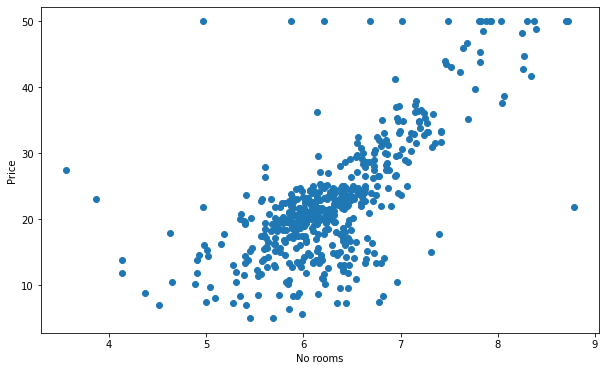

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(data['RM'],data['PRICE'])
plt.title='Prices of houses based on number of rooms'
plt.xlabel('No rooms')
plt.ylabel('Price')

C:\Users\julia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


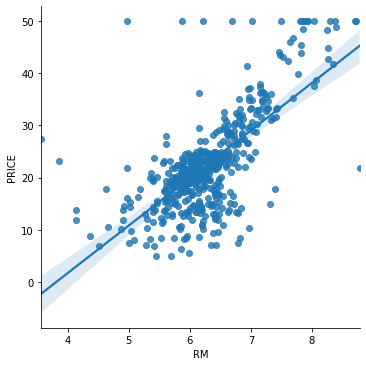

In [25]:
sns.lmplot('RM','PRICE',data=data)

Wall time: 20.8 s


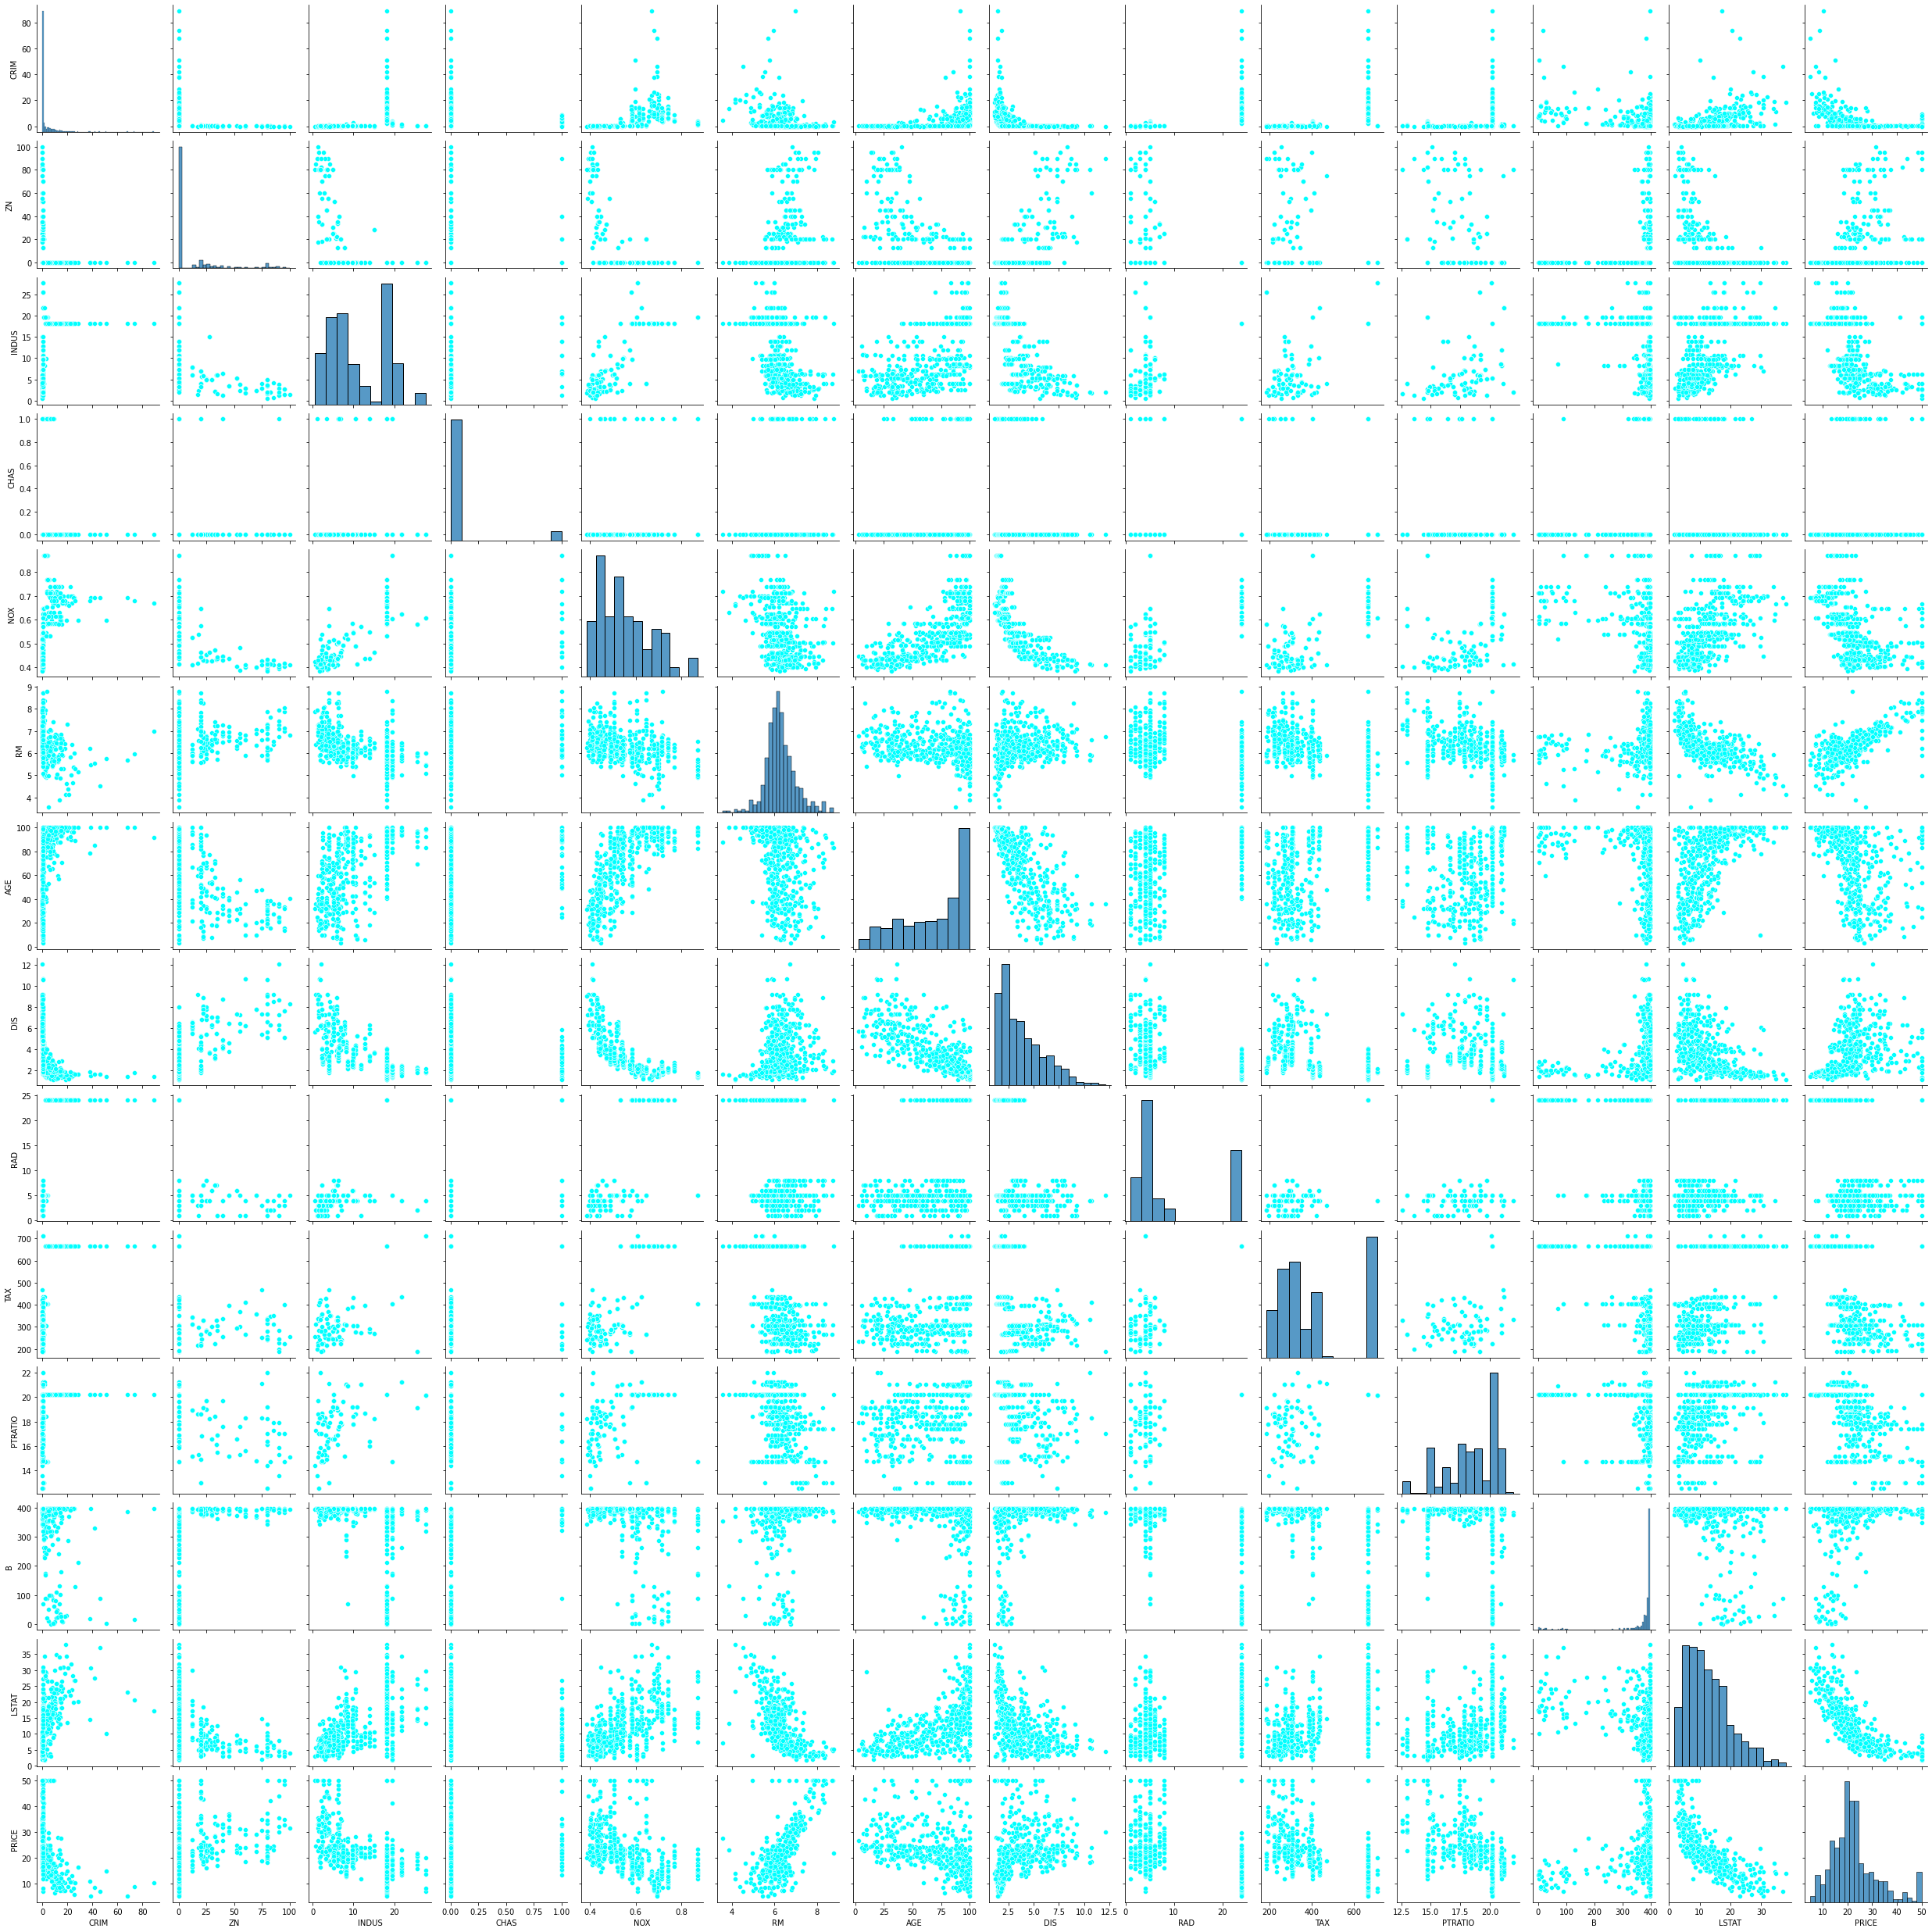

In [26]:
%%time
sns.pairplot(data,plot_kws={'color':'cyan'})

In [27]:
X=data.drop('PRICE', axis=1)

In [28]:
y=data['PRICE']

In [29]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [30]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [32]:
model=LinearRegression()
model.fit(X_train,y_train)
print(f'R squared for train data is: {model.score(X_train,y_train)}')
print(f'R squared for train data is: {model.score(X_train,y_train)}')
print(f'Intercept is: {model.intercept_}')
model.coef_
df=pd.DataFrame(model.coef_,index=X_train.columns, columns=['coef'])
df

R squared for train data is: 0.750121534530608
R squared for train data is: 0.750121534530608
Intercept is: 36.53305138282439


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [33]:
data['PRICE'].skew()

1.1080984082549072

In [34]:
np.log(data['PRICE'])

0      3.178054
1      3.072693
2      3.546740
3      3.508556
4      3.589059
         ...   
501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, Length: 506, dtype: float64

C:\Users\julia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

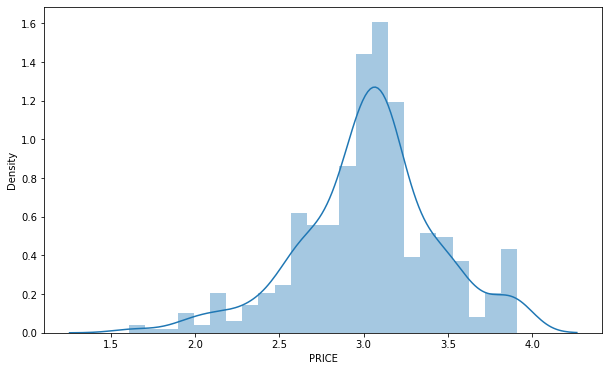

In [35]:
plt.figure(figsize=(10,6))
y_log=np.log(y)
sns.distplot(y_log)

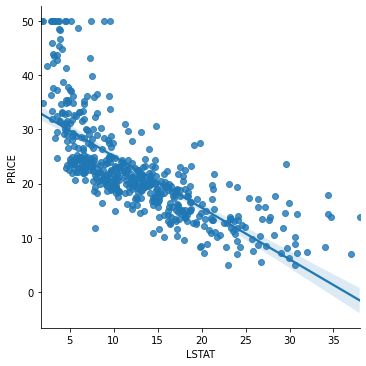

In [36]:
sns.lmplot(x='LSTAT',y='PRICE',data=data)

In [37]:
model=LinearRegression()
y=np.log(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
model.fit(X_train,y_train)
print(f'R squared for train data is: {model.score(X_train,y_train)}')
print(f'R squared for train data is: {model.score(X_train,y_train)}')
print(f'Intercept is: {model.intercept_}')
model.coef_
df=pd.DataFrame(model.coef_,index=X_train.columns, columns=['coef'])
df

R squared for train data is: 0.7930234826697583
R squared for train data is: 0.7930234826697583
Intercept is: 4.05994387177519


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [38]:
X_incl_const=sm.add_constant(X_train)
model=sm.OLS(y_train,X_incl_const)
res=model.fit()
df=pd.DataFrame({'coef':res.params,'pval':round(res.pvalues,3)})

df


,coef,pval
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
variance_inflation_factor(exog=X_incl_const.values,exog_idx=1)

1.7145250443932485

In [41]:
vif=[]
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const.values,exog_idx=i))
pd.DataFrame({'coef':res.params,'vif':np.round(vif,3)})

,coef,vif
const,4.059944,597.549
CRIM,-0.010672,1.715
ZN,0.001579,2.333
INDUS,0.002030,3.943
CHAS,0.080331,1.079
NOX,-0.704068,4.410
RM,0.073404,1.840
AGE,0.000763,3.327
DIS,-0.047633,4.223
RAD,0.014565,7.314


In [42]:
X_incl_const=sm.add_constant(X_train)
model=sm.OLS(y_train,X_incl_const)
res=model.fit()
df_orig=pd.DataFrame({'coef':res.params,'pval':np.round(res.pvalues,3)})
df_orig
print(f'BIC is {res.bic}')
print(f'r2 is {res.rsquared}')

BIC is -139.74997769478875
r2 is 0.7930234826697582


In [43]:
X_incl_const=sm.add_constant(X_train)
X_incl_const=X_incl_const.drop('INDUS',axis=1)
model=sm.OLS(y_train,X_incl_const)
res=model.fit()
df_red=pd.DataFrame({'coef':res.params,'pval':np.round(res.pvalues,3)})
df_red
print(f'BIC is {res.bic}')
print(f'r2 is {res.rsquared}')

BIC is -145.14508855591163
r2 is 0.7927126289415163


In [44]:
X_incl_const=sm.add_constant(X_train)
X_incl_const=X_incl_const.drop(['INDUS','AGE'],axis=1)
model=sm.OLS(y_train,X_incl_const)
res=model.fit()
df_red2=pd.DataFrame({'coef':res.params,'pval':np.round(res.pvalues,3)})
df_red2
print(f'BIC is {res.bic}')
print(f'r2 is {res.rsquared}')

BIC is -149.49934294224656
r2 is 0.7918657661852815


In [45]:
lst_df=[df_orig,df_red,df_red2]
all_df=pd.concat(lst_df,axis=1)

In [46]:
all_df

,coef,pval,coef,pval,coef,pval
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


BIC is -149.49934294224656
r2 is 0.7918657661852815


Text(0, 0.5, 'Residuals')

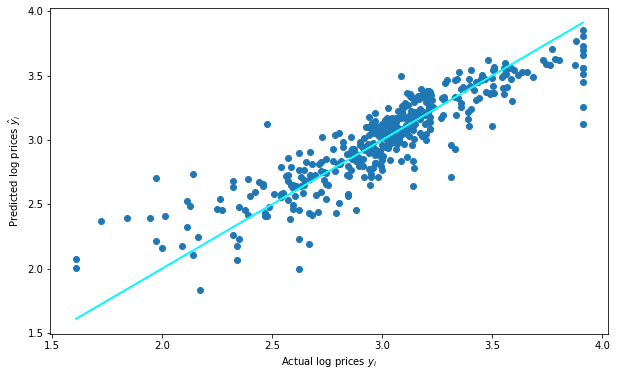

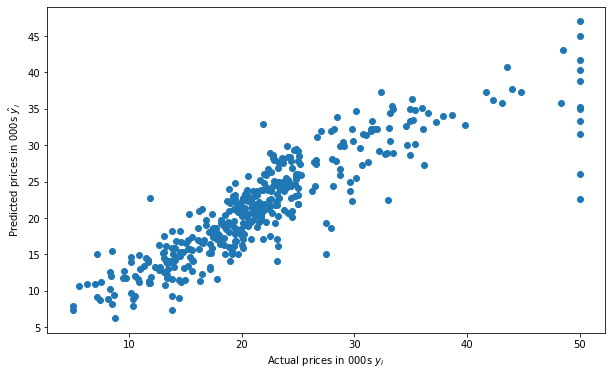

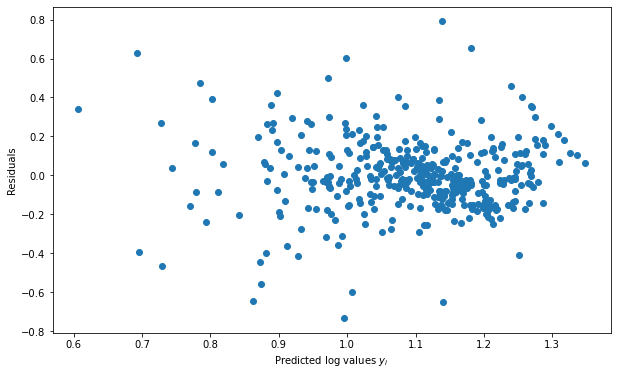

In [47]:
#Reduced log model

y=np.log(data['PRICE'])
X=data.drop(['INDUS','AGE','PRICE'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=10)
X_incl_const=sm.add_constant(X_train)

model=sm.OLS((y_train),X_incl_const)
res=model.fit()
df=pd.DataFrame({'coef':res.params,'pval':np.round(res.pvalues,3)})
df
print(f'BIC is {res.bic}')
print(f'r2 is {res.rsquared}')
plt.figure(figsize=(10,6))
plt.scatter(y_train,res.fittedvalues)
plt.plot(y_train, y_train, color='cyan')
plt.xlabel('Actual log prices $y _i$')
plt.ylabel('Predicted log prices $\hat y _i$')

plt.figure(figsize=(10,6))
plt.scatter(np.e**(y_train),np.e**(res.fittedvalues))
plt.xlabel('Actual prices in 000s $y _i$')
plt.ylabel('Predicted prices in 000s $\hat y _i$')

plt.figure(figsize=(10,6))
plt.scatter(np.log(res.fittedvalues),res.resid)
plt.xlabel('Predicted log values $y _i$')
plt.ylabel('Residuals')


C:\Users\julia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew is 0.1177587620118495
Mean is -0.0


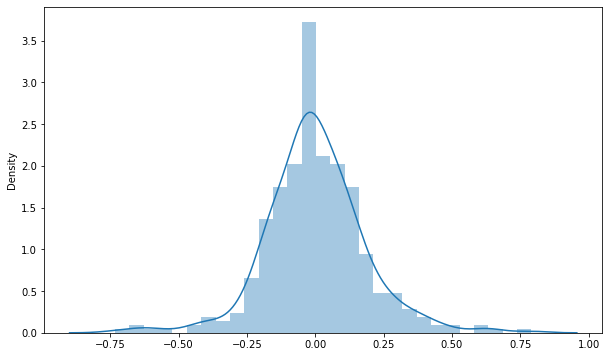

In [48]:
plt.figure(figsize=(10,6))
sns.distplot(res.resid)
print(f'Skew is {res.resid.skew()}')
print(f'Mean is {round(res.resid.mean(),3)}')
red_mse=res.mse_resid

BIC is 2424.9546968561976
r2 is 0.750121534530608


Text(0, 0.5, 'Residuals')

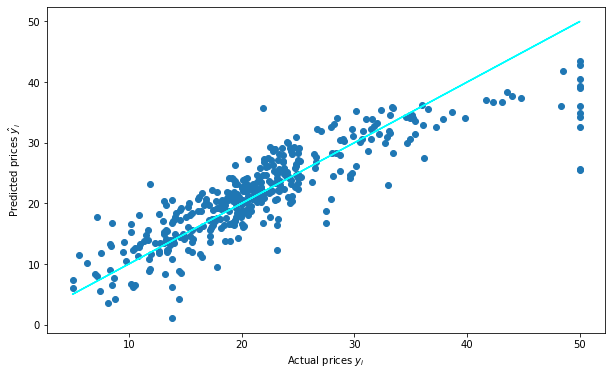

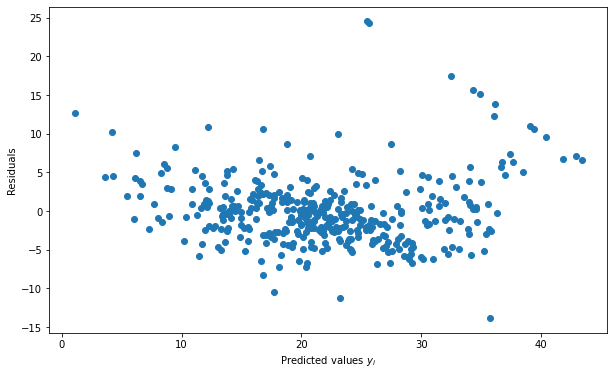

In [49]:
#Original model with normal prices and all features

X=data.drop(['PRICE'],axis=1)
y=data['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=10)
X_incl_const=sm.add_constant(X_train)

model=sm.OLS((y_train),X_incl_const)
res=model.fit()
df=pd.DataFrame({'coef':res.params,'pval':np.round(res.pvalues,3)})
df
print(f'BIC is {res.bic}')
print(f'r2 is {res.rsquared}')
plt.figure(figsize=(10,6))
plt.scatter(y_train,res.fittedvalues)
plt.plot(y_train, y_train, color='cyan')
plt.xlabel('Actual prices $y _i$')
plt.ylabel('Predicted prices $\hat y _i$')


plt.figure(figsize=(10,6))
plt.scatter(res.fittedvalues,res.resid)
plt.xlabel('Predicted values $y _i$')
plt.ylabel('Residuals')

C:\Users\julia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew is 1.4594428196679858
Mean is 0.0
MSE is 19.921197403247987
R2 is 0.750121534530608


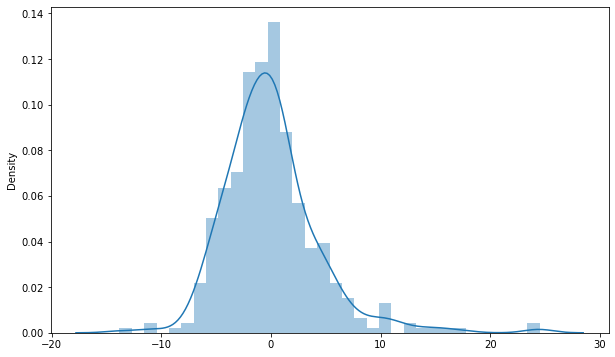

In [50]:
plt.figure(figsize=(10,6))
sns.distplot(res.resid)
print(f'Skew is {res.resid.skew()}')
print(f'Mean is {round(res.resid.mean(),3)}')
print(f'MSE is {res.mse_resid}')
print(f'R2 is {res.rsquared}')

full_mse=res.mse_resid

BIC is 211.6927723817349
r2 is 0.4599600787154918
Skew is -0.017374505196459788
Mean is 0.0
MSE is 0.08957094488471323
R2 is 0.4599600787154918


C:\Users\julia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


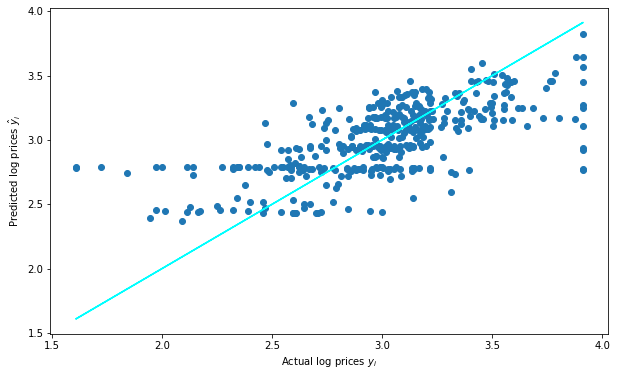

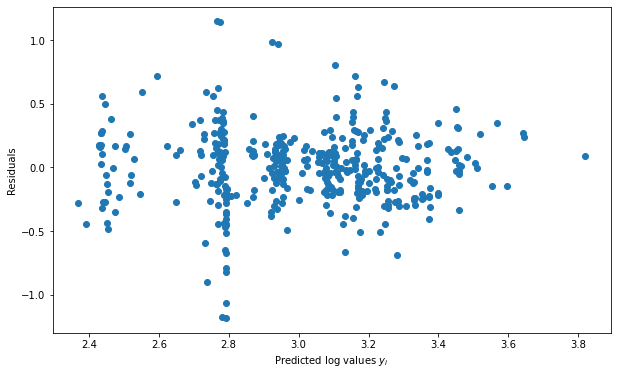

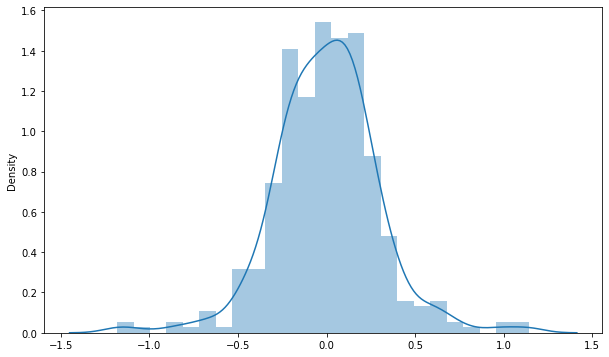

In [51]:
# Model Omitting Key Features using log prices

X=data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'],axis=1)
y=np.log(data['PRICE'])
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=10)
X_incl_const=sm.add_constant(X_train)

model=sm.OLS((y_train),X_incl_const)
res=model.fit()
df=pd.DataFrame({'coef':res.params,'pval':np.round(res.pvalues,3)})
df
print(f'BIC is {res.bic}')
print(f'r2 is {res.rsquared}')
plt.figure(figsize=(10,6))
plt.scatter(y_train,res.fittedvalues)
plt.plot(y_train, y_train, color='cyan')
plt.xlabel('Actual log prices $y _i$')
plt.ylabel('Predicted log prices $\hat y _i$')


plt.figure(figsize=(10,6))
plt.scatter(res.fittedvalues,res.resid)
plt.xlabel('Predicted log values $y _i$')
plt.ylabel('Residuals')

plt.figure(figsize=(10,6))
sns.distplot(res.resid)
print(f'Skew is {res.resid.skew()}')
print(f'Mean is {round(res.resid.mean(),3)}')
print(f'MSE is {res.mse_resid}')
print(f'R2 is {res.rsquared}')

omitted_mse=res.mse_resid

In [52]:
#Comparing the three models

mse_list=[red_mse,full_mse,omitted_mse]
df=pd.DataFrame(mse_list,index=['Reduced model','Original model','Omitted feat model'],columns=['MSE'])

In [53]:
df

,MSE
Reduced model,0.034873
Original model,19.921197
Omitted feat model,0.089571


In [54]:
df['RMSE']=np.sqrt(df['MSE'])

In [55]:
df

,MSE,RMSE
Reduced model,0.034873,0.186744
Original model,19.921197,4.463317
Omitted feat model,0.089571,0.299284


In [56]:
# For an estimate for a house price of $30,000, we will calculate the upper and lower bound
# for a 95% prediction interval using the reduced log model

In [57]:
#upper bound
upper=np.log(30) + 2*np.sqrt(red_mse)
lower=np.log(30) - 2*np.sqrt(red_mse)


In [58]:
print(f'Upper bound in log prices for a house of 30,000 dollars is {upper}')
print(f'Upper bound in actual prices for a house of 30,000 dollars is {np.e**(upper)*1000}')
print(f'Lower bound in log prices for a house of 30,000 dollars is {lower}')
print(f'Lower bound in actual prices for a house of 30,000 dollars is {np.e**(lower)*1000}')

Upper bound in log prices for a house of 30,000 dollars is 3.774685645593144
Upper bound in actual prices for a house of 30,000 dollars is 43583.8054007552
Lower bound in log prices for a house of 30,000 dollars is 3.027709117731167
Lower bound in actual prices for a house of 30,000 dollars is 20649.87193579029


In [ ]:
import 